In [2]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

!pip install utils
from utils import *

nltk.download('twitter_samples')

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=885e8fcf2124c60a23b0fe2df1f6370340746ae045ebae7fe77b35b67efd4e90
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [1]:
# import our convenience functions
def process_tweet(tweet):
 stemmer=PorterStemmer()
 stopwords_english = stopwords.words('english')
 tweet = re.sub(r'\$\w*', '', tweet)
 tweet = re.sub(r'^RT[\s]+', '', tweet)
 tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
 tweet = re.sub(r'#', '', tweet)
 tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
 tweet_tokens = tokenizer.tokenize(tweet)

 tweets_clean = []
 for word in tweet_tokens:
    if (word not in stopwords_english and
            word not in string.punctuation):
        stem_word = stemmer.stem(word)  # stemming word
        tweets_clean.append(stem_word)

 return tweets_clean

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [5]:
all_positive_tweets= twitter_samples.strings('positive_tweets.json')
all_negative_tweets= twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets+all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)
#labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

#split
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos+train_neg

print('Number of tweets:', len(train_x))


Number of tweets: 8000


In [7]:
data = pd.read_csv('/content/logistic_features.csv'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first 10 data entries

bias  positive  negative  sentiment
0   1.0    3020.0      61.0        1.0
1   1.0    3573.0     444.0        1.0
2   1.0    3005.0     115.0        1.0
3   1.0    2862.0       4.0        1.0
4   1.0    3119.0     225.0        1.0
5   1.0    2955.0     119.0        1.0
6   1.0    3934.0     538.0        1.0
7   1.0    3162.0     276.0        1.0
8   1.0     628.0     189.0        1.0
9   1.0     264.0     112.0        1.0

In [11]:
X=data[['bias', 'positive', 'negative']].values
Y=data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [12]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

Text(0, 0.5, 'Negative')

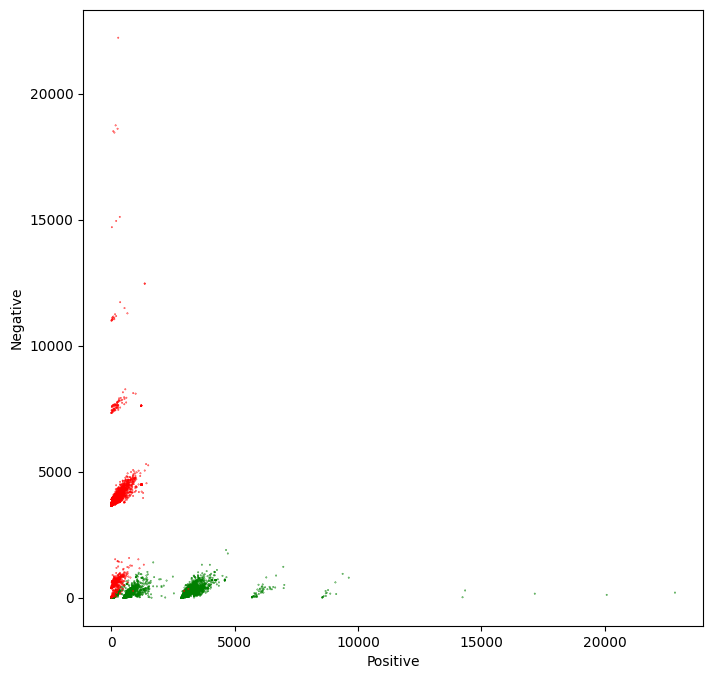

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c= [colors[int(K)] for K in Y], s=0.1) #s=size of dots

plt.xlabel("Positive")
plt.ylabel("Negative")


In [16]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
  return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested
# in the direction. So this direction is just a perpendicular function to the
# separation plane
# df(pos, W) = pos * w2 / w1

def direction(theta, pos):
  return pos * theta[2] / theta[1]

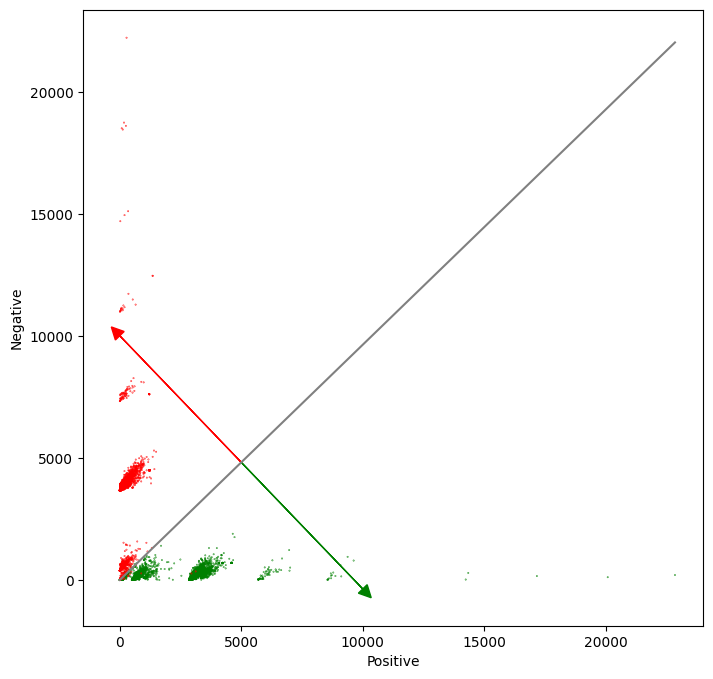

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

maxpos = np.max(X[:,1])
offset = 5000

#divides the 2 areas
ax.plot([0, maxpos],[neg(theta, 0), neg(theta, maxpos)],color='gray')

#positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500,
         fc='g',ec='g')
#negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500,
         fc='r',ec='r')
plt.show()